In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import pickle
import json
import seaborn as sns

In [32]:
pred_list = []
proba_list = []

f1_list = []
auroc_list = []
pr_list = []
rc_list = []
acc_list = []

n_folds = 5
file_path = 'predictions/ResNet/Try1_5Fold/'
y_test = np.load('../data/Haleh/y_test.npy')

avg_f1 = 0.0
avg_auroc = 0.0
avg_pr = 0.0
avg_rc = 0.0
avg_acc = 0.0

best_score = 0.0

for i in range(n_folds):
    pred_list.append(np.load(file_path + f'y_pred_fold_{i+1}.npy'))
    proba_list.append(np.load(file_path + f'y_proba_Fold_{i+1}.npy'))
    
    f1_list.append(metrics.f1_score(y_test, pred_list[i]))
    auroc_list.append(metrics.roc_auc_score(y_test, proba_list[i][:, 1]))
    pr_list.append(metrics.precision_score(y_test, pred_list[i]))
    rc_list.append(metrics.recall_score(y_test, pred_list[i]))
    acc_list.append(metrics.balanced_accuracy_score(y_test, pred_list[i]))
    
    avg_f1 += f1_list[i]
    avg_auroc += auroc_list[i]
    avg_pr += pr_list[i]
    avg_rc += rc_list[i]
    avg_acc += acc_list[i]
    
    if f1_list[i] > best_score:
        best_score = f1_list[i]
        best_y_pred = pred_list[i]
        best_y_proba = proba_list[i]
    
avg_f1 /= n_folds
avg_auroc /= n_folds
avg_pr /= n_folds
avg_rc /= n_folds
avg_acc /= n_folds
    

In [33]:
print('Balanced Acccuracy: \t{:.3f} ± {:.3f}'.format(avg_acc, np.std(acc_list)))
#print('Accuracy: \t\t{:.3f} ± {:.3f}'.format(acc))
print('AUROC: \t\t\t{:.3f} ± {:.3f}'.format(avg_auroc, np.std(auroc_list)))
print('F1:\t\t\t{:.3f} ± {:.3f}'.format(avg_f1, np.std(f1_list)))
print('Recall: \t\t{:.3f} ± {:.3f}'.format(avg_rc, np.std(rc_list)))
print('Precision: \t\t{:.3f} ± {:.3f}'.format(avg_pr, np.std(pr_list)))
#fig, ax = plt.subplots(1, 1, figsize=(15, 15))

Balanced Acccuracy: 	0.618 ± 0.012
AUROC: 			0.662 ± 0.015
F1:			0.310 ± 0.012
Recall: 		0.471 ± 0.068
Precision: 		0.235 ± 0.023


Balanced Acccuracy: 	0.633
Recall: 		0.486
Precision: 		0.249
F1: 			0.329


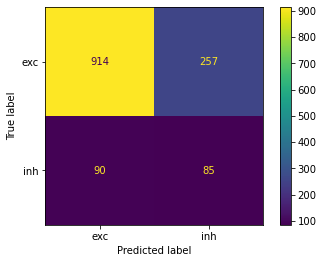

In [34]:
score = metrics.balanced_accuracy_score(y_test, best_y_pred)
recall = metrics.recall_score(y_test, best_y_pred)
precision = metrics.precision_score(y_test, best_y_pred)
f1 = metrics.f1_score(y_test, best_y_pred)

print('Balanced Acccuracy: \t{:.3f}'.format(score))
print('Recall: \t\t{:.3f}'.format(recall))
print('Precision: \t\t{:.3f}'.format(precision))
print('F1: \t\t\t{:.3f}'.format(f1))

cm = metrics.confusion_matrix(y_test, best_y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['exc', 'inh'])
disp.plot()

In [6]:
with (open(file_path + 'params.pickle', "rb")) as openfile:
    while True:
        try:
            params = pickle.load(openfile)
        except EOFError:
                break

print(json.dumps(params, indent=4, sort_keys=False))

{
    "n_blocks": 3,
    "activation": "relu",
    "optimizer": "AdamW",
    "class_weights": [
        0.15,
        6.0
    ],
    "weight_decay": 4e-05,
    "dropout": 0.5,
    "lr": 3.0954352203123486e-05
}


(49, 1725)
(1081, 1725)
(90, 1725)
(126, 1725)


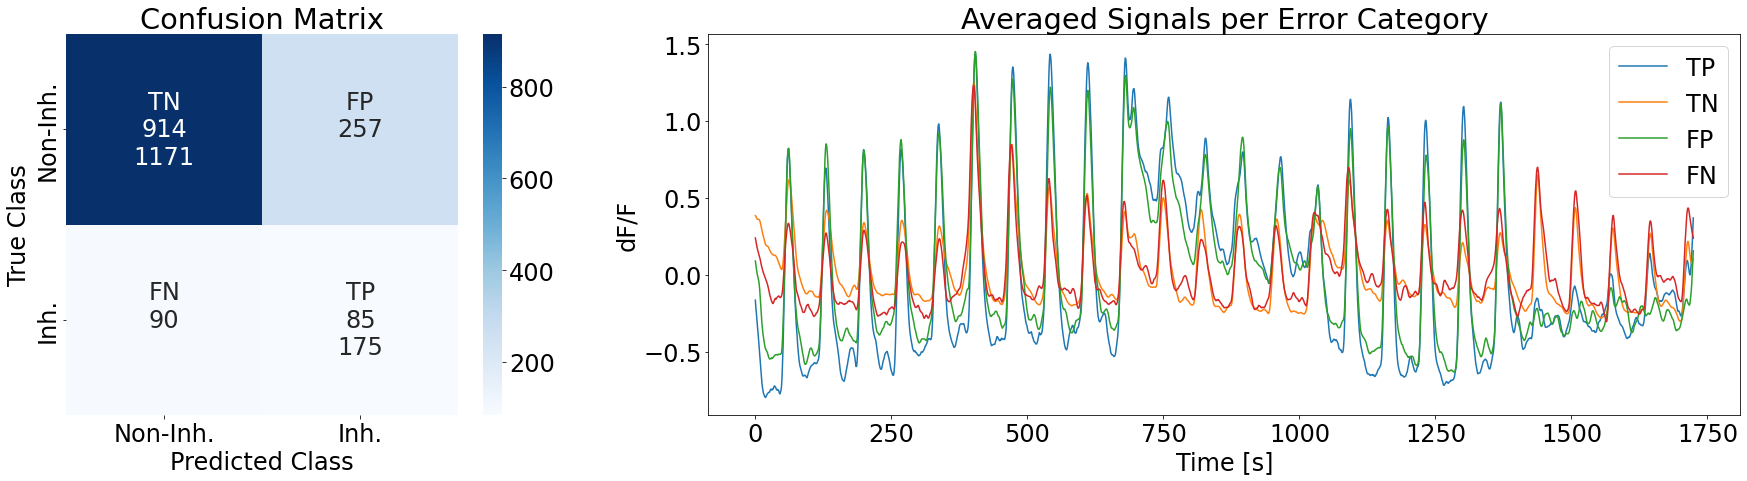

In [86]:
X_temp = np.load('../data/Haleh/X_test.npy')
y_test = np.load('../data/Haleh/y_test.npy')
thresh = 0.5
plotTP = X_temp[(best_y_proba[:, 1] >= thresh) * (y_test == 1)]
plotTN = X_temp[(best_y_proba[:, 1] <= (1-thresh)) * (y_test == 0)]
plotFP = X_temp[(best_y_proba[:, 1] >= thresh) * (y_test == 0)]
plotFN = X_temp[(best_y_proba[:, 1] <= (1-thresh)) * (y_test == 1)]
print(plotTP.shape)
print(plotTN.shape)
print(plotFP.shape)
print(plotFN.shape)
fig, ax = plt.subplots(1, 2, figsize=(30, 7), gridspec_kw={'width_ratios': [0.95, 2]})
plt.rcParams.update({'font.size': 24})

cm = metrics.confusion_matrix(y_test, best_y_pred)
group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
#gt_counts = [f'{int(y_test[y_test==0].shape[0])}', '', '', f'{int(y_test[y_test==1].shape[0])}']

group_percentages = ["{0:.2%}".format(value) for value in [plotTN/(plotTN+plotFP), plotFP/()]]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts, gt_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues', ax=ax[0])
ax[0].set_xticklabels(['Non-Inh.','Inh.'])
ax[0].set_yticklabels(['Non-Inh.','Inh.'])
ax[0].set_xlabel('Predicted Class')
ax[0].set_ylabel('True Class')
for tick in ax[0].get_yticklabels():
    tick.set_rotation(90)

ax[1].plot(np.mean(plotTP, axis=0).T, label='TP')
ax[1].plot(np.mean(plotTN, axis=0).T, label='TN')
ax[1].plot(np.mean(plotFP, axis=0).T, label='FP')
ax[1].plot(np.mean(plotFN, axis=0).T, label='FN')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('dF/F')

ax[0].set_title("Confusion Matrix")
ax[1].set_title("Averaged Signals per Error Category")
ax[1].legend()
#plt.savefig('Best_Prediction.png')